# Destek Vektör Makineleri
## Veri Madenciligi ve Mak Öğr. Alg. Dersi
### 4 Aralık 2024

İris veriseti ve sklearn kütüphanesi kullanılacaktır.

Öğr. Gör. Süleyman EZDEMİR

In [2]:
# Kullanılacak kütüphanelerin eklenmesi
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Kullanılacak verisetini yüklüyoruz.
Irıs verisetini sklearn'den yükleyelim

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
# veriyi dataframe dönüştürme
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target']=iris.target

In [6]:
print("Verisetinin ilk 5 satırı")
print(df.head())

Verisetinin ilk 5 satırı
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
0                5.1               3.5                1.4               0.2       0
1                4.9               3.0                1.4               0.2       0
2                4.7               3.2                1.3               0.2       0
3                4.6               3.1                1.5               0.2       0
4                5.0               3.6                1.4               0.2       0


## Özellik ve etiketleri belirleme
x -> özellikler (çiçeğin genişlik ve uzunluk gibi bilgilerini alacak)

y -> etiketler (setona, vericolor gibi çiçek etiketiğini belirtecek)

In [7]:
X = df.iloc[:,:-1].values
y = df['target'].values

## Veri setini EĞİTİM ve TEST olarak ayırma

train_test_split komutu ile böleceğiz.

**x** -> özellikleri ifade eder. çiçeğin uzunluk genişlik gibi bilgileri

**y** -> hedef değişkenimiz. Çiçeğin türünü ifade eder.

**test_size=0.3** -> verisetinin %30'unu test %70'ini eğitim için kullanır.

**random_state=42** -> rastgelelik durumunu ifade eder. kod tekrar çalıştırıldığında aynı bölme işlemi için 42 yazmak yeterli olacaktır.

**stratify=y** -> veriseti bölümünde sınıf dağılımını korur. Yani versicolor, setona, vignica sonucları aynı oranda olmaya çalışacak.


In [8]:
X_egitim, X_test, y_egitim, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

## SVM Modelini Oluşturma ve Eğitme
RBF kernel kullanan bir SVM modeli tanımlayalım

**kernel='rbf'** -> kullanılacak matematiksel yöntem

**C=1** -> modelin hata toleransını kontrol eder

**gamma='scale'** -> tek bir veri noktasının ne kadar etkili olacağını ifade ederiz. Scale gamma değerini verisetine göre otomatik ayarlar.

In [11]:
svm_model = SVC(kernel='rbf',C=1,gamma='scale')

In [ ]:
svm_model.fit(X_egitim,y_egitim)

## Yapay Zeka modelinin Performansının Değerlendirilmesi
accuracy_score ile performans skorunu hesaplatma

In [13]:
#test verisi üzerinde tahmin etme
y_tahmin=svm_model.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test,y_tahmin)
print("Modelin dogruluk oranı:",accuracy)
print("Sınıflama Raporu:")
print(classification_report(y_test,y_tahmin,target_names=iris.target_names))

Modelin dogruluk oranı: 0.9555555555555556
Sınıflama Raporu:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Görselleştirme
PCA ile özellikleri 2 boyutta görselleştirme

In [19]:
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X)

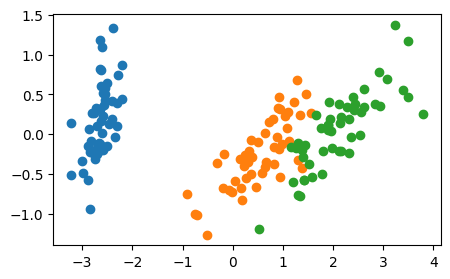

In [21]:
plt.figure(figsize=(5,3))
for i, target_name in enumerate(iris.target_names):
  plt.scatter(X_pca[y==i,0], X_pca[y==i,1],label=target_name)

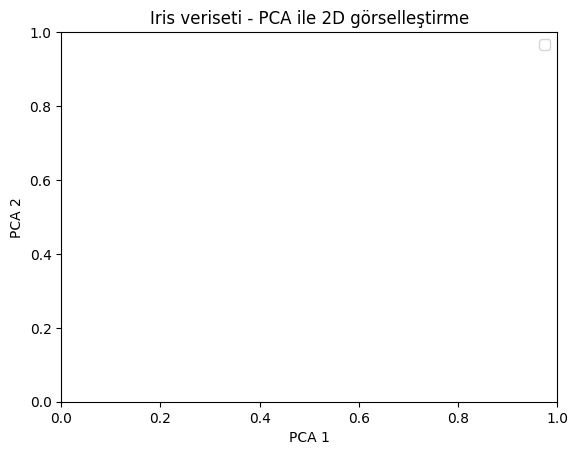

In [22]:
plt.title("Iris veriseti - PCA ile 2D görselleştirme")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()